# load float log

In [1]:
import os
from glob import glob
import yaml

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cognac.float as fl
import cognac.float.seabot as sb

---
## load data

In [2]:
root_dir = '/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/'
#root_dir = root_dir+'bassin0_bags/'
root_dir = root_dir+'bassin1_bags/'

bags = sb.find_bags(root_dir)
logs = sb.find_logs(root_dir)

[print(b) for b in bags]

/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-14-18-07_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-14-35-39_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-14-55-40_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-15-04-14_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-15-15-25_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-15-28-29_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-15-41-36_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-15-48-45_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_2020-06-18-16-14-23_0
/Users/aponte/Current_projects/cognac/tests/202006_ifremer/data/bassin1_bags/pd_20

[None, None, None, None, None, None, None, None, None, None]

In [3]:
# compare configurations
_c0 = None
for i, f, l in zip(range(len(bags)), bags, logs):
    print('-- mission {}, {} --'.format(i, f.split('/')[-1]))
    bdata = sb.load_bag(f)
    avel = bdata['mission']['approach_velocity'].median()
    lvel = bdata['mission']['limit_velocity'].median()
    print('limit_velocity = {}, approach_velocity = {}'.format(lvel, avel))
    _c1 = sb.load_config_from_log(l)
    if _c0:
        sb.compare_config(_c0, _c1)
    _c0 = _c1
    print('')

-- mission 0, pd_2020-06-18-14-18-07_0 --
limit_velocity = 0.1, approach_velocity = 1.0

-- mission 1, pd_2020-06-18-14-35-39_0 --
limit_velocity = 0.1, approach_velocity = 1.0

-- mission 2, pd_2020-06-18-14-55-40_0 --
limit_velocity = 0.1, approach_velocity = 0.1

-- mission 3, pd_2020-06-18-15-04-14_0 --
limit_velocity = 0.1, approach_velocity = 0.1

-- mission 4, pd_2020-06-18-15-15-25_0 --
limit_velocity = 0.1, approach_velocity = 0.1
driver->filter->iridium->kalman->mission->physics->regulation->safety :
 -  battery_limit  :  11.0
 +  battery_limit  :  9.0

-- mission 5, pd_2020-06-18-15-28-29_0 --
limit_velocity = 0.1, approach_velocity = 0.3

-- mission 6, pd_2020-06-18-15-41-36_0 --
limit_velocity = 0.1, approach_velocity = 0.3
driver->filter->iridium->kalman :
 -  gamma_alpha_offset  :  5.0
 +  gamma_alpha_offset  :  20.0

-- mission 7, pd_2020-06-18-15-48-45_0 --
limit_velocity = 0.1, approach_velocity = 0.3

-- mission 8, pd_2020-06-18-16-14-23_0 --
limit_velocity = 0.1, ap

Text(0.5, 1.0, 'piston position')

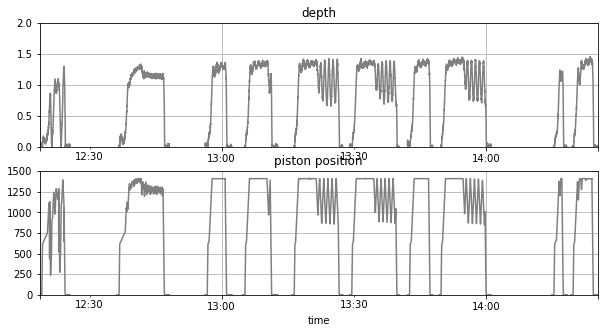

In [4]:
fig, ax = plt.subplots(2,1, figsize=(10,5))

for f in bags:
    bdata = sb.load_bag(f)
    df = sb.resample_join('500ms',
                      bdata['depthFusion']['depth'],
                      bdata['pistonState']['position']
                     )
    df['depth'].plot(color='0.5',
                     ax=ax[0],
                     ylim=(0,2))
    df['position'].plot(color='0.5',
                        ax=ax[1],
                        ylim=(0,1500))
ax[0].grid()
ax[0].set_title('depth')
ax[0].set_xlabel('')
ax[1].grid()
ax[1].set_title('piston position')

Text(0.5, 1.0, 'piston position')

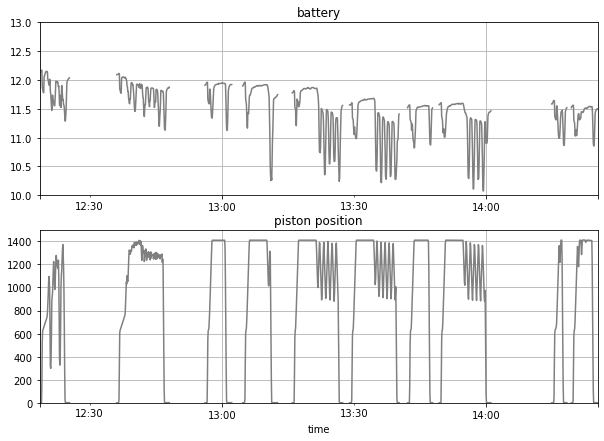

In [5]:
fig, ax = plt.subplots(2,1, figsize=(10,7))

for f in bags:
    bdata = sb.load_bag(f)
    df = sb.resample_join('5s',
                      bdata['depthFusion']['depth'],
                      bdata['pistonState']['position'],
                      bdata['batteryFusion']['b1'].rename('battery')
                     )
    df['battery'].plot(color='0.5',
                     ax=ax[0],
                     ylim=(10,13))
    df['position'].plot(color='0.5',
                        ax=ax[1],
                        ylim=(0,1500))
ax[0].grid()
ax[0].set_title('battery')
ax[0].set_xlabel('')
ax[1].grid()
ax[1].set_title('piston position')